# import

In [1]:
import json
import copy
import math
import random

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import albumentations as album

Duplicate key in file 'C:\\Users\\User\\.matplotlib\\matplotlibrc' line #250.


# 乱数シード初期化(必要であれば)

In [2]:
# Albumentations内の乱数は、Pythonのrandomモジュールに依存しているため、シード固定したい場合は本セルを実行する
random.seed(9)

# テスト用画像&バウンディングボックス情報準備

In [3]:
# テスト用画像とバウンディングボックスを読み込み
test_image = cv.imread('image/hedgehog.jpg')
test_maskimage = cv.imread('image/hedgehog_mask.jpg')

bbox_json = open('image/hedgehog.json')
bbox_json = json.load(bbox_json)

bboxes = []
classes = []
for region in bbox_json.get('regions'):
    bbox = region.get('boundingBox')
    bboxes.append([bbox['left'], bbox['top'], bbox['width'], bbox['height']])
    classes.append(0)
    
# 画像、アノテーション情報保持用変数
annotation = {'image': test_image, 'bboxes': bboxes, 'category_id': classes}

# 補助関数準備(描画用関数、グリッド付与関数)

In [4]:
# バウンディングボックス描画用関数
def draw_boundingbox(augmented_results, use_bbox=True):
    # 画像を3列に並べた場合の行数
    column = 3
    row = math.ceil(len(augmented_results) / column)

    # 描画領域設定
    plt.figure(figsize=(16, 9))

    # データ拡張結果から画像とバウンディングボックス情報を取り出し描画
    for i, augmented_result in enumerate(augmented_results):
        augmented_image = augmented_result['image']
        debug_image = copy.deepcopy(augmented_image)
        debug_image = np.ascontiguousarray(debug_image)
        
        # augmented_category_id = augmented_result['category_id']  # 未使用

        # バウンディングボックス描画
        if use_bbox:
            augmented_bboxes = augmented_result['bboxes']
            for augmented_bbox in augmented_bboxes:
                x1, y1 = int(augmented_bbox[0]), int(augmented_bbox[1])
                x2, y2 = int(x1 + augmented_bbox[2]), int(y1 + augmented_bbox[3])

                debug_image = cv.rectangle(debug_image, (x1, y1), (x2, y2), (0,255,0), 5)

        # 画像描画
        plt.subplot(row, column, i+1)
        plt.imshow(cv.cvtColor(debug_image, cv.COLOR_BGR2RGB))

    plt.show()

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


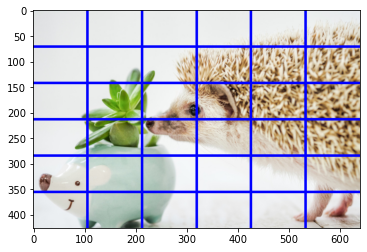

In [5]:
# グリッド線描画関数
def create_grid_image(image, divide_num=6):
    width, height = image.shape[1], image.shape[0]
    debug_image = copy.deepcopy(image)

    for i in range(1, divide_num):
        debug_image = cv.line(debug_image, (int((width / divide_num) * i), 0), (int((width / divide_num) * i), height), (255, 0, 0), thickness=3)
        debug_image = cv.line(debug_image, (0, int((height / divide_num) * i)), (width, int((height / divide_num) * i)), (255, 0, 0), thickness=3)

    return debug_image


# グリッド線付与例
grid_image = create_grid_image(test_image)
plt.imshow(cv.cvtColor(grid_image, cv.COLOR_BGR2RGB))
plt.show()  

# データ拡張(albumentations.augmentations)

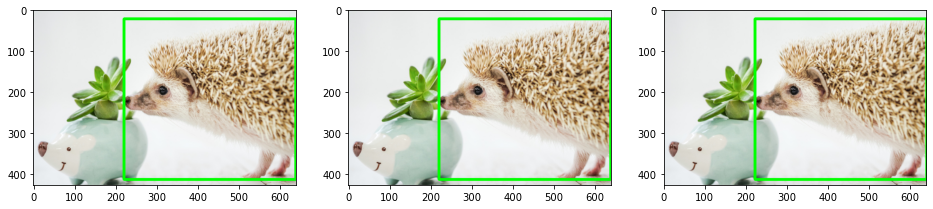

In [6]:
# 0．テスト用画像描画(データ拡張未実施)
def compose_augmentation():
    transform = [
        album.NoOp(),
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

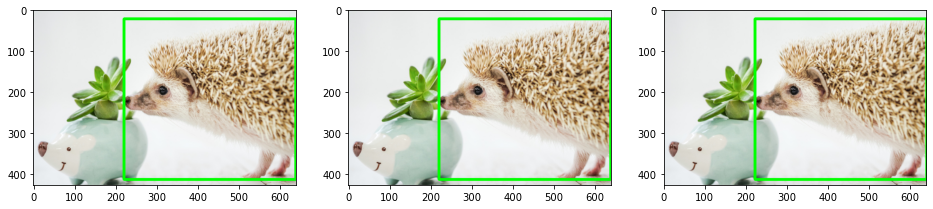

In [7]:
# 1．ぼかし(Blur)
def compose_augmentation():
    transform = [
        album.Blur(blur_limit=15, p=1.0),  # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):#実行回数を3回に
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

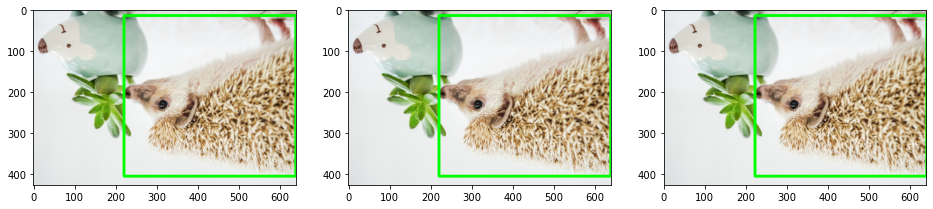

In [8]:
# 2．垂直反転(VerticalFlip)
def compose_augmentation():
    transform = [
        album.VerticalFlip(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

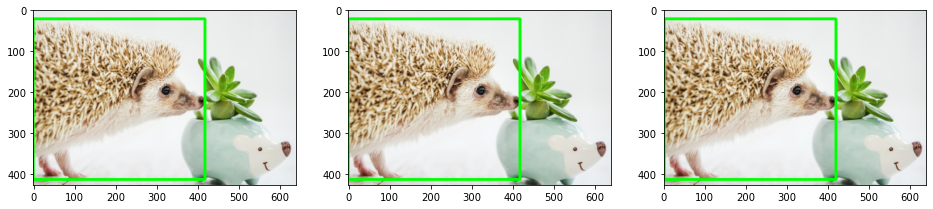

In [9]:
# 3．水平反転(HorizontalFlip)
def compose_augmentation():
    transform = [
        album.HorizontalFlip(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

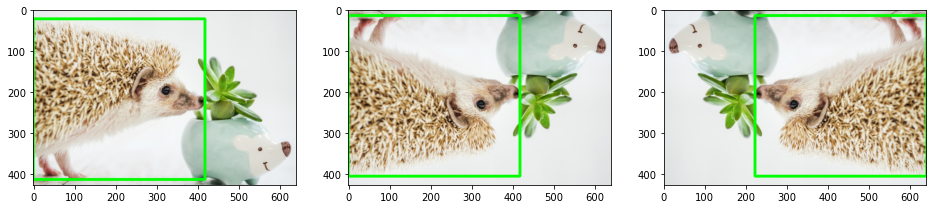

In [10]:
# 4．水平垂直反転(Flip)
def compose_augmentation():
    transform = [
        album.Flip(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


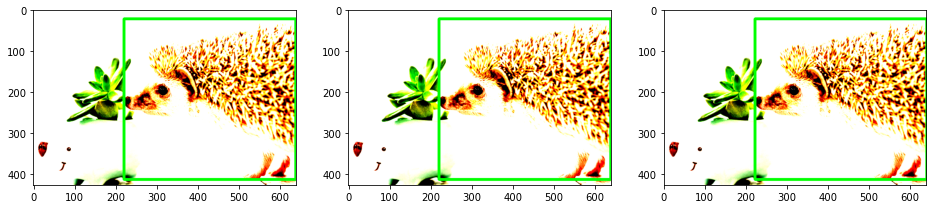

In [11]:
# 5．ノーマライズ(Normalize)
def compose_augmentation():
    transform = [
        album.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225), max_pixel_value=255.0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

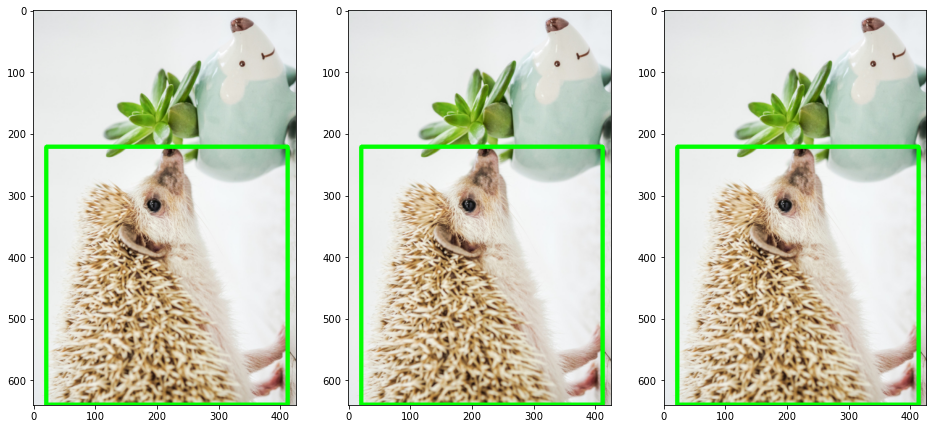

In [12]:
# 6．行列転置(Transpose)
def compose_augmentation():
    transform = [
        album.Transpose(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

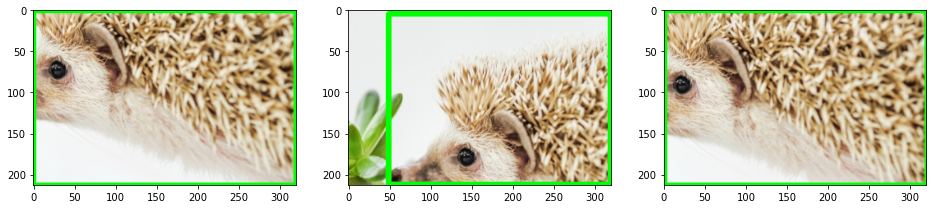

In [13]:
# 7．ランダムクロップ(RandomCrop)
crop_width, crop_height = int(test_image.shape[1] * 0.5), int(test_image.shape[0] * 0.5) 
def compose_augmentation():
    transform = [
        album.RandomCrop(height=crop_height, width=crop_width, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

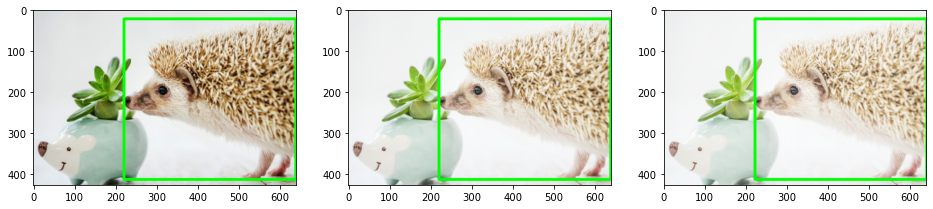

In [14]:
# 8．ランダムガンマ補正(RandomGamma)
def compose_augmentation():
    transform = [
        album.RandomGamma(gamma_limit=(50, 150), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

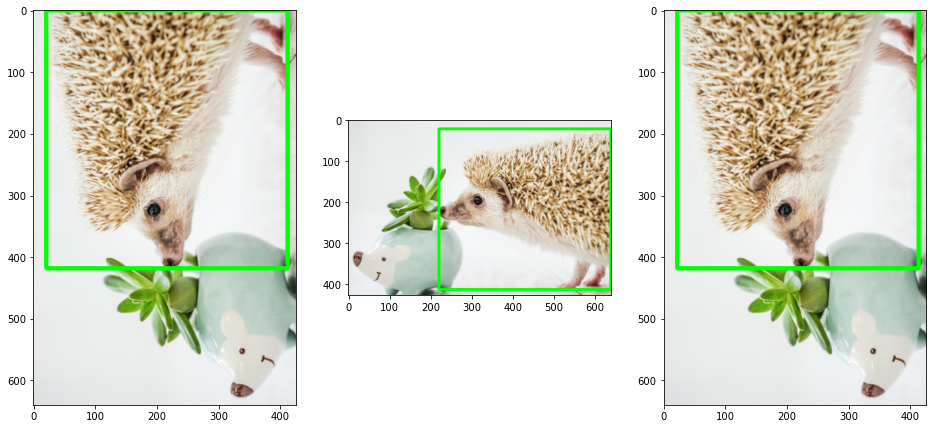

In [15]:
# 9．ランダム90度回転(RandomRotate90) ※N回90度回転
def compose_augmentation():
    transform = [
        album.RandomRotate90(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

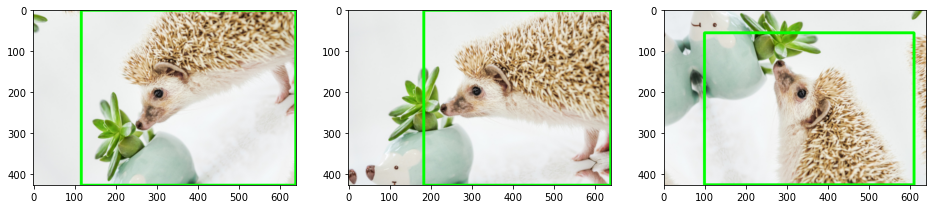

In [16]:
# 10．ランダム回転(Rotate)
def compose_augmentation():
    transform = [
        album.Rotate(limit=90, interpolation=1, border_mode=4, value=None, mask_value=None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

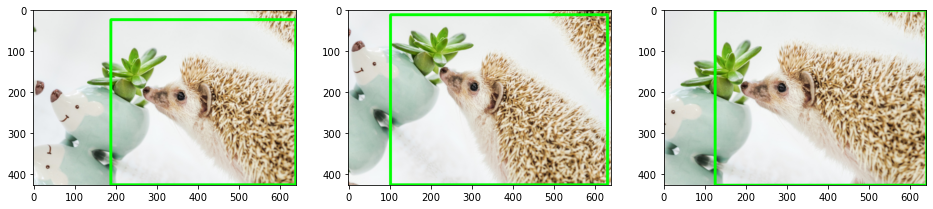

In [17]:
# 11．ランダムアフィン変換(ShiftScaleRotate) ※ランダムスケール、ランダム回転
def compose_augmentation():
    transform = [
        album.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, interpolation=1, border_mode=4, value=None, mask_value=None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

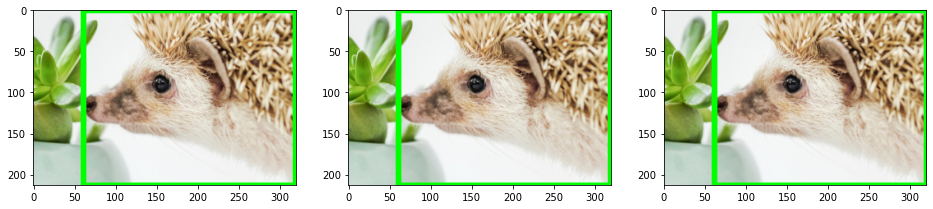

In [18]:
# 12．センタークロップ(CenterCrop)
crop_width, crop_height = int(test_image.shape[1] * 0.5), int(test_image.shape[0] * 0.5) 
def compose_augmentation():
    transform = [
        album.CenterCrop(width=crop_width, height=crop_height, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

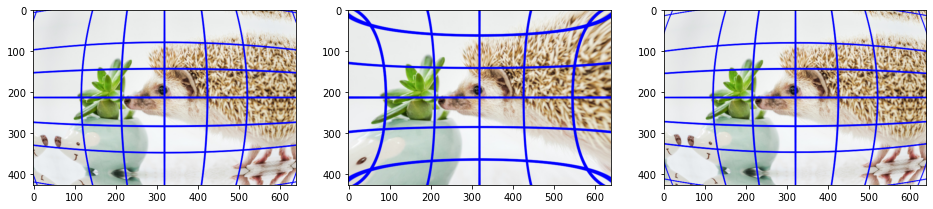

In [19]:
# 13．光学ひずみ(OpticalDistortion)
def compose_augmentation():
    transform = [
        album.OpticalDistortion(distort_limit=1, shift_limit=0.05, interpolation=1, border_mode=4, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform)

# グリッド線付与
grid_image = create_grid_image(test_image)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=grid_image)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results, use_bbox=False)

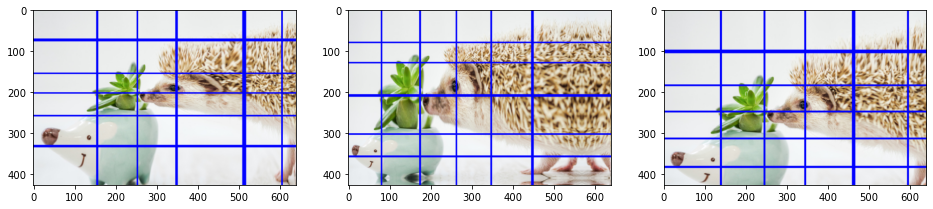

In [20]:
# 14．グリッドひずみ(GridDistortion)
def compose_augmentation():
    transform = [
        album.GridDistortion(num_steps=6, distort_limit=0.5, interpolation=1, border_mode=4, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform)

# グリッド線付与
grid_image = create_grid_image(test_image)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=grid_image)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results, use_bbox=False)

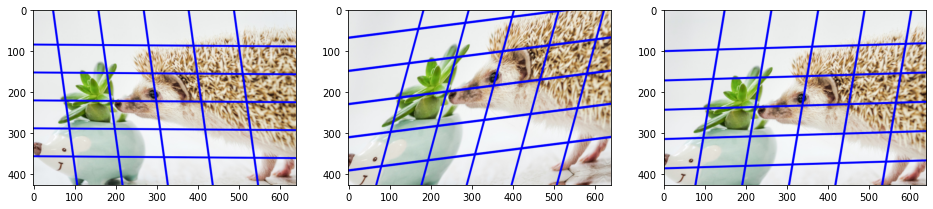

In [21]:
# 15．弾性変形(ElasticTransform)
def compose_augmentation():
    transform = [
        album.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, interpolation=1, border_mode=4, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform)

# グリッド線付与
grid_image = create_grid_image(test_image)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=grid_image)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results, use_bbox=False)

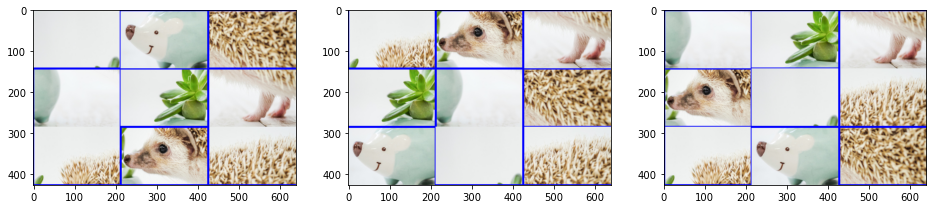

In [22]:
# 16．ランダムグリッドシャッフル(RandomGridShuffle)
def compose_augmentation():
    transform = [
        album.RandomGridShuffle(grid=(3, 3), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform)

# グリッド線付与
grid_image = create_grid_image(test_image, 3)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=grid_image)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results, use_bbox=False)

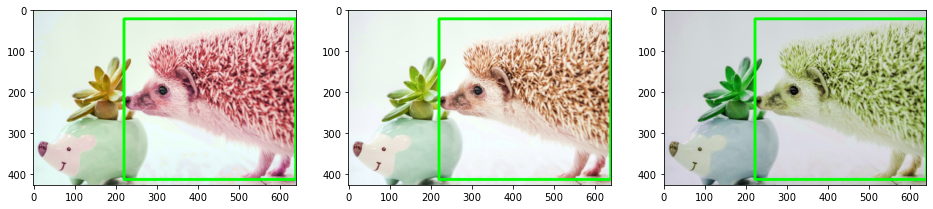

In [23]:
# 17．HSV変換(HueSaturationValue)
def compose_augmentation():
    transform = [
        album.HueSaturationValue(hue_shift_limit=30, sat_shift_limit=30, val_shift_limit=30, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

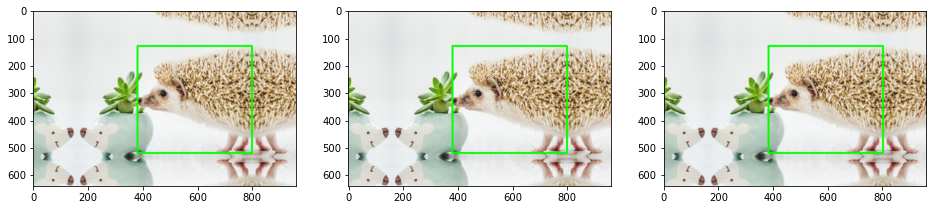

In [24]:
# 18．パディング付与(PadIfNeeded)
pad_width, pad_height = int(test_image.shape[1] * 1.5), int(test_image.shape[0] * 1.5) 
def compose_augmentation():
    transform = [
        album.PadIfNeeded(min_height=pad_height, min_width=pad_width, border_mode=4, value=None, mask_value=None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

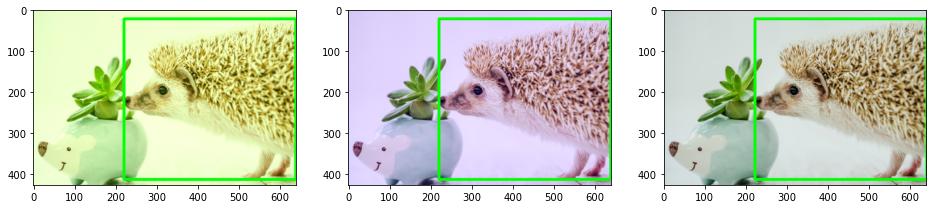

In [25]:
# 19．RGBランダムシフト(RGBShift)
def compose_augmentation():
    transform = [
        album.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

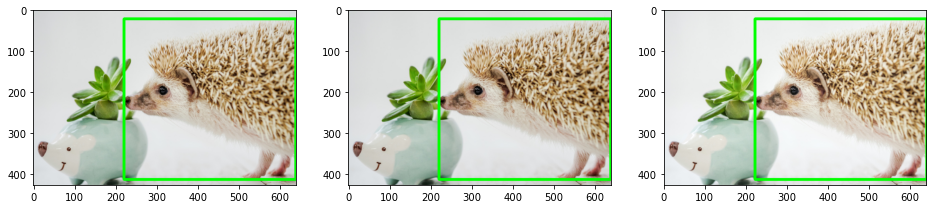

In [26]:
# 20．輝度ランダム変更(RandomBrightness)
def compose_augmentation():
    transform = [
        album.RandomBrightness(limit=0.2, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

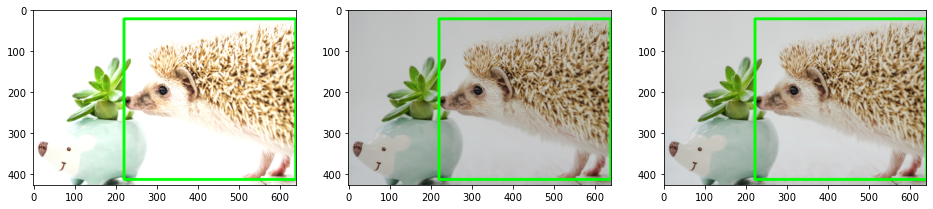

In [27]:
# 21．コントラストランダム変更(RandomContrast)
def compose_augmentation():
    transform = [
        album.RandomContrast(limit=0.2, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

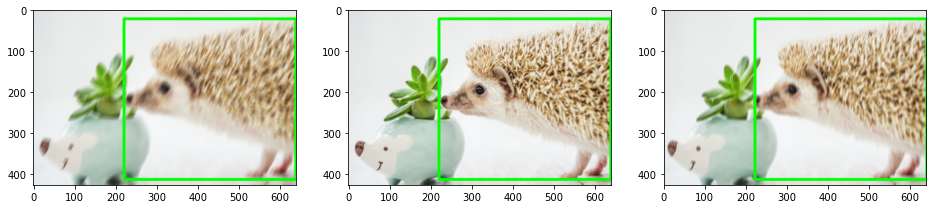

In [28]:
# 22．モーションブラー付与(MotionBlur)
def compose_augmentation():
    transform = [
        album.MotionBlur(blur_limit=30, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [29]:
# 23．メディアンブラー付与(MedianBlur)
def compose_augmentation():
    transform = [
        album.MedianBlur(blur_limit=30, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

ValueError: MedianBlur supports only odd blur limits.

In [ ]:
# 24．ガウシアンブラー付与(GaussianBlur)
def compose_augmentation():
    transform = [
        album.GaussianBlur(blur_limit=30, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 25．ガウスノイズ付与(GaussNoise)
def compose_augmentation():
    transform = [
        album.GaussNoise(var_limit=(10.0, 100.0), mean=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 26．ガラスブラー付与(GlassBlur)
def compose_augmentation():
    transform = [
        album.GlassBlur(sigma=0.7, max_delta=4, iterations=2, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 27．コントラスト制限付き適応ヒストグラム均等化(CLAHE)
def compose_augmentation():
    transform = [
        album.CLAHE(clip_limit=4.0, tile_grid_size=(8, 8), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 28．RGBチャンネルランダムシャッフル(ChannelShuffle)
def compose_augmentation():
    transform = [
        album.ChannelShuffle(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 29．ピクセル値反転(InvertImg)
def compose_augmentation():
    transform = [
        album.InvertImg(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 30．グレースケール化(ToGray)
def compose_augmentation():
    transform = [
        album.ToGray(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 31．セピア化(ToSepia)
def compose_augmentation():
    transform = [
        album.ToSepia(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 32．JPEG圧縮劣化(JpegCompression)
def compose_augmentation():
    transform = [
        album.JpegCompression(quality_lower=0, quality_upper=30, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 33．WebP圧縮劣化(ImageCompression)
def compose_augmentation():
    transform = [
        album.ImageCompression(quality_lower=0, quality_upper=30, compression_type=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 34．ランダムカットアウト(Cutout) ※正方形領域
def compose_augmentation():
    transform = [
        album.Cutout(num_holes=16, max_h_size=32, max_w_size=32, fill_value=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 35．ランダムカットアウト(CoarseDropout) ※矩形領域
def compose_augmentation():
    transform = [
        album.CoarseDropout(max_holes=16, max_height=32, max_width=32, min_holes=1, min_height=8, min_width=8, fill_value=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 36．float化(ToFloat) ※0.0～1.0
def compose_augmentation():
    transform = [
        album.ToFloat(max_value=None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

# 37.FromFloat向けデータ退避
float_image = augmented_results[0]['image']

In [ ]:
# 37．整数化(FromFloat)
def compose_augmentation():
    transform = [
        album.FromFloat(dtype='uint8', max_value=255, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=float_image, bboxes=bboxes, category_id=classes)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 38．切り抜き(Crop)
def compose_augmentation():
    transform = [
        album.Crop(x_min=50, y_min=50, x_max=400, y_max=300, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 39．マスクを使用した切り抜き(CropNonEmptyMaskIfExists)
width, height = int(test_image.shape[1] * 0.5), int(test_image.shape[0] * 0.5) 
def compose_augmentation():
    transform = [
        album.CropNonEmptyMaskIfExists(height=height, width=width, ignore_values=None, ignore_channels=None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=test_image, mask=test_maskimage, bboxes=bboxes, category_id=classes)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 40．ランダムスケール(RandomScale)
def compose_augmentation():
    transform = [
        album.RandomScale(scale_limit=0.5, interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 41．マックススケーリング(LongestMaxSize)
width = int(test_image.shape[1] * 2.0)
def compose_augmentation():
    transform = [
        album.LongestMaxSize(max_size=width, interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 42．ミニマムスケーリング(SmallestMaxSize)
width = int(test_image.shape[1] * 0.25)
def compose_augmentation():
    transform = [
        album.SmallestMaxSize(max_size=width, interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 42．リサイズ(Resize)
def compose_augmentation():
    transform = [
        album.Resize(height=300, width=300, interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 43．ランダムクロップ後、一定のサイズに再スケーリング(RandomSizedCrop)
width, height = int(test_image.shape[1] * 0.5), int(test_image.shape[0] * 0.5) 
def compose_augmentation():
    transform = [
        album.RandomSizedCrop(min_max_height=(height, width), height=300, width=300, w2h_ratio=(width/height), interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 44．ランダムクロップ後、一定のサイズに再スケーリング(RandomResizedCrop)
width, height = int(test_image.shape[1] * 0.5), int(test_image.shape[0] * 0.5) 
def compose_augmentation():
    transform = [
        album.RandomResizedCrop(height=300, width=300, scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333), interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 45．輝度およびコントラストのランダム変更(RandomSizedBBoxSafeCrop)
def compose_augmentation():
    transform = [
        album.RandomBrightnessContrast(brightness_limit=0.5, contrast_limit=0.5, brightness_by_max=True, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 46．bboxを維持したランダムクロップ(RandomSizedBBoxSafeCrop)
width, height = int(test_image.shape[1] * 1.0), int(test_image.shape[0] * 1.0) 
def compose_augmentation():
    transform = [
        album.RandomSizedBBoxSafeCrop(height=height, width=width, erosion_rate=0.0, interpolation=1, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 47．ランダム雪シミュレート(RandomSnow)
def compose_augmentation():
    transform = [
        album.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.5, brightness_coeff=2.5, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 48-0．ランダム雨シミュレート(RandomRain) ※rain_type：None
def compose_augmentation():
    transform = [
        album.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=3, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type=None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 48-1．ランダム雨シミュレート(RandomRain) ※rain_type："drizzle"
def compose_augmentation():
    transform = [
        album.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=3, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type="drizzle", p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 48-2．ランダム雨シミュレート(RandomRain) ※rain_type："heavy"
def compose_augmentation():
    transform = [
        album.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=3, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type="heavy", p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 48-3．ランダム雨シミュレート(RandomRain) ※rain_type："torrential"
def compose_augmentation():
    transform = [
        album.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=3, drop_color=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type="torrential", p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 49．ランダム霧シミュレート(RandomFog)
def compose_augmentation():
    transform = [
        album.RandomFog(fog_coef_lower=0.3, fog_coef_upper=1, alpha_coef=0.08, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 50．ランダム太陽シミュレート(RandomSunFlare)
def compose_augmentation():
    transform = [
        album.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0, angle_upper=1, num_flare_circles_lower=6, num_flare_circles_upper=10, src_radius=400, src_color=(255, 255, 255), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 51．ランダム影シミュレート(RandomShadow)
def compose_augmentation():
    transform = [
        album.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 52．ランダムチャンネルドロップ(ChannelDropout)
def compose_augmentation():
    transform = [
        album.ChannelDropout(channel_drop_range=(1, 1), fill_value=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 53．ISOノイズ(ISONoise)
def compose_augmentation():
    transform = [
        album.ISONoise(color_shift=(0.01, 0.5), intensity=(0.5, 0.9), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 54．ソラリゼーション(Solarize) ※閾値を超えるピクセル値を反転
def compose_augmentation():
    transform = [
        album.Solarize(threshold=200, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 55．ヒストグラム平均化(Equalize)
def compose_augmentation():
    transform = [
        album.Equalize(mode='cv', by_channels=True, mask=None, mask_params=(), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 56．ポスタリゼーション(Posterize) ※各カラーチャネルのビット数を減らす
def compose_augmentation():
    transform = [
        album.Posterize(num_bits=4, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 57．ダウンスケール/アップスケールバックによる画質低下(Downscale)
def compose_augmentation():
    transform = [
        album.Downscale(scale_min=0.10, scale_max=0.50, interpolation=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 58．ノイズ乗算(MultiplicativeNoise)
def compose_augmentation():
    transform = [
        album.MultiplicativeNoise(multiplier=(0.7, 1.3), per_channel=False, elementwise=False, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 59．Fancy PCA
# 参考：https://pixelatedbrian.github.io/2018-04-29-fancy_pca/
def compose_augmentation():
    transform = [
        album.FancyPCA(alpha=0.3, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 60．マスクドロップアウト(MaskDropout)
def compose_augmentation():
    transform = [
        album.MaskDropout(max_objects=1, image_fill_value=0, mask_fill_value=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform)

# データ拡張実行
augment_function = compose_augmentation()

ret, maskimage = cv.threshold(test_maskimage, 128, 255, cv.THRESH_BINARY)

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=test_image, mask=maskimage)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results, use_bbox=False)

In [ ]:
# 61．グリッドドロップアウト(GridDropout)
def compose_augmentation():
    transform = [
        album.GridDropout(ratio = 0.5, unit_size_min = None, unit_size_max = None, holes_number_x = None, holes_number_y = None, shift_x = 0, shift_y = 0, random_offset = False, fill_value = 0, mask_fill_value = None, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=test_image)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results, use_bbox=False)

In [ ]:
# ToDo
# RandomCropNearBBox(max_part_shift=0.3, always_apply=False, p=1.0)[source]olor=(200, 200, 200), blur_value=7, brightness_coefficient=0.7, rain_type=None, always_apply=False, p=0.5)[source]
# →cropping_bboxの使用方法を確認する
# Lambda(image=None, mask=None, keypoint=None, bbox=None, name=None, always_apply=False, p=1.0)[source]
# →自由度が高いため例を検討する

# imgaugヘルパー(albumentations.imgaug)

In [ ]:
# 62．imgaugヘルパー：DualIAATransform
def compose_augmentation():
    transform = [
        album.DualIAATransform(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 63．imgaugヘルパー：ImageOnlyIAATransform
def compose_augmentation():
    transform = [
        album.ImageOnlyIAATransform(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 64．imgaugヘルパー：エンボス(IAAEmboss)
def compose_augmentation():
    transform = [
        album.IAAEmboss(alpha=(0.1, 0.9), strength=(0.1, 0.9), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 65．imgaugヘルパー：スーパーピクセル(IAASuperpixels)
def compose_augmentation():
    transform = [
        album.IAASuperpixels(p_replace=0.1, n_segments=100, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 66．imgaugヘルパー：先鋭化(IAASharpen)
def compose_augmentation():
    transform = [
        album.IAASharpen(alpha=(0.2, 0.5), lightness=(0.5, 1.0), p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 67．imgaugヘルパー：ガウスノイズ(IAAAdditiveGaussianNoise)
def compose_augmentation():
    transform = [
        album.IAAAdditiveGaussianNoise(loc=0, scale=(2.5500000000000003, 12.75), per_channel=False, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 68．imgaugヘルパー：クロッピング＆パディング(IAACropAndPad)
def compose_augmentation():
    transform = [
        album.IAACropAndPad(px=None, percent=None, pad_mode='constant', pad_cval=0, keep_size=True, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 69．imgaugヘルパー：左右反転(IAAFliplr)
def compose_augmentation():
    transform = [
        album.IAAFliplr(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 70．imgaugヘルパー：上下反転(IAAFlipud)
def compose_augmentation():
    transform = [
        album.IAAFlipud(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 71．imgaugヘルパー：アフィン変換(IAAAffine)
def compose_augmentation():
    transform = [
        album.IAAAffine(scale=0.9, translate_percent=None, translate_px=None, rotate=0.2, shear=0.2, order=1, cval=0, mode='reflect', p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 72．imgaugヘルパー：区分線形アフィン変換(IAAPiecewiseAffine)
def compose_augmentation():
    transform = [
        album.IAAPiecewiseAffine(scale=(0.03, 0.05), nb_rows=4, nb_cols=4, order=1, cval=0, mode='constant', p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# グリッド線付与
grid_image = create_grid_image(test_image)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=grid_image, bboxes=bboxes, category_id=classes)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

In [ ]:
# 73．imgaugヘルパー：ランダム4点透視変換(IAAPerspective)
def compose_augmentation():
    transform = [
        album.IAAPerspective(scale=(0.05, 0.1), keep_size=True, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# グリッド線付与
grid_image = create_grid_image(test_image)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(image=grid_image, bboxes=bboxes, category_id=classes)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

# 補足

複数のデータ拡張を同時に適用したい場合は、Compose()のtransformを以下のように指定する。

In [ ]:
def compose_augmentation():
    transform = [
        album.Flip(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
        album.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
        album.CoarseDropout(max_holes=16, max_height=32, max_width=32, min_holes=1, min_height=8, min_width=8, fill_value=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.Compose(transform, bbox_params={'format':'coco', 'label_fields':['category_id']})

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)

Compose()の代わりに、OneOf()を使用すると指定したオペレーションの中から一つをランダムに適用する。
※bbox_paramsの指定は出来ない(ver0.4.5時点)

In [ ]:
def compose_augmentation():
    transform = [
        album.Flip(p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
        album.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
        album.CoarseDropout(max_holes=16, max_height=32, max_width=32, min_holes=1, min_height=8, min_width=8, fill_value=0, p=1.0), # p(変換を適用する確率)は効果確認のため1.0指定
    ]
    return album.OneOf(transform)

# データ拡張実行
augment_function = compose_augmentation()

number_of_trials = 3
augmented_results = []
for i in range(number_of_trials):
    augmented_result = augment_function(**annotation)
    augmented_results.append(augmented_result)

# データ拡張結果描画
draw_boundingbox(augmented_results)